Here I elaborate and fit the BK channel on the data provided by *Rothbergs and Magleby, 2000*.
https://doi.org/10.1085/jgp.116.1.75

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

Here **alpha** represents the closing rates. 
1. The data were plot on a logarithmic scale, which is not good for fitting. I scale the values to a linear scale.
2. The units were micromolar while NEURON uses millimolar.
3. In figure 3D, they use seconds but NEURON uses milliseconds.

In [2]:
# data contained in figure 3B.
alpha_r0 = pd.read_csv('open_time.csv')

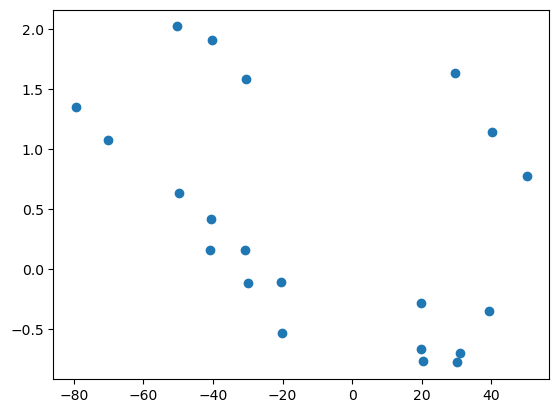

In [3]:
plt.scatter(alpha_r0.v, alpha_r0.tau)

In [4]:
alpha_r0['ca'] = alpha_r0['ca'] / 1000.0        # transform Ca2+ conc. to millimolar
alpha_r0['tau'] = np.power(10, alpha_r0['tau']) # transform interval to linear scale
alpha_r0['rate'] = 1.0 / alpha_r0['tau']        # get the rates

In [5]:
# data contained in figure 3D, white dots.
alpha_r1 = pd.read_csv('close_rates.csv')

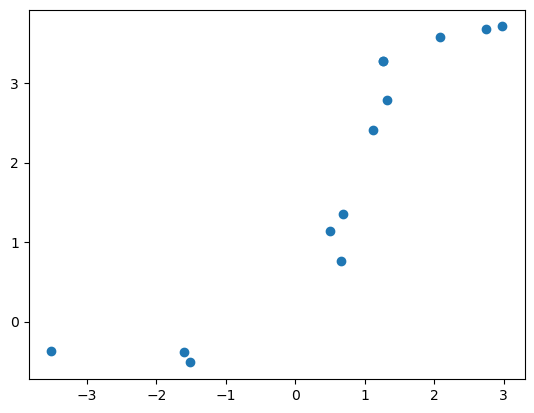

In [6]:
plt.scatter(alpha_r1.ca, alpha_r1.rate)

In [7]:
alpha_r1['v'] = 30.0                          # the data were obtained by clamping at +30mV
alpha_r1['ca'] = np.power(10, alpha_r1['ca']) # transform Ca2+ conc. to linear
alpha_r1['ca'] = alpha_r1['ca'] / 1000.0      # transform Ca2+ conc. to millimolar

alpha_r1['rate'] = np.power(10, alpha_r1['rate']) # transform interval to linear scale
alpha_r1['tau'] = 1 / alpha_r1['rate']           # transform from 1/s to s
alpha_r1['tau'] = alpha_r1['tau'] * 1000.0       # transform seconds to milliseconds
alpha_r1['rate'] = 1 / alpha_r1['tau']           # transform from ms to 1/ms

In [8]:
alpha_r = pd.concat([ alpha_r0, alpha_r1 ]) # merge the datasets

In [9]:
def alpha(v, ca):
    alpha_max = 0 + 5.46548878 / (1 + np.exp(-(np.log10(ca) + 1.61322084) / 0.24917329)) 
    k = 8.263928565595934 + 1.2552204 / (1 + np.exp(-(np.log10(ca) + 1.61382309) / 0.03180212))  
    vhalf = 52.094347461863926 - 69.4428835 / (1 + np.exp(-(np.log10(ca) + 1.70836237) / 0.0236872607))
    y = alpha_max / (1 + np.exp(-(v - vhalf) / k))
    return y

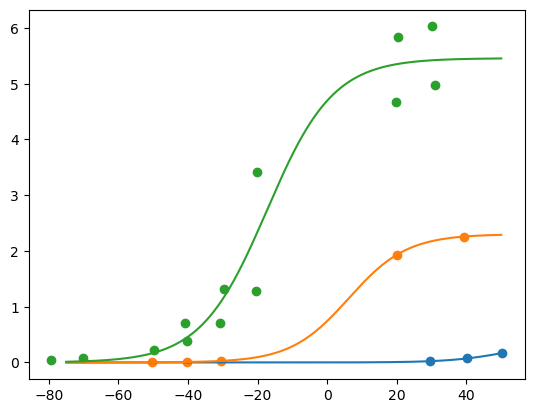

In [10]:
v = np.arange(-75, 50, 0.01)

for ca, g in alpha_r0.groupby('ca'):
    plt.scatter(g['v'], g['rate'])
    a = alpha(v, ca)
    plt.plot(v, a)

(-1.0, 10.0)

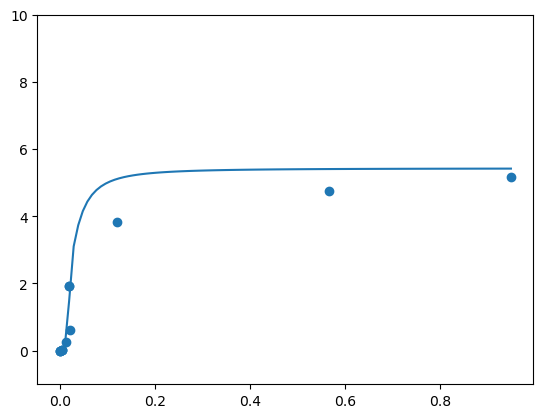

In [12]:
ca = np.linspace(alpha_r1['ca'].min(), alpha_r1['ca'].max(), 100)

plt.scatter(alpha_r1['ca'], alpha_r1['rate'])
a = alpha(30, ca)
plt.plot(ca, a)
plt.ylim([-1, 10])

Here **beta** represents the opening rates. 

In [13]:
# data contained in figure 3B.
beta_r0 = pd.read_csv('close_time.csv')

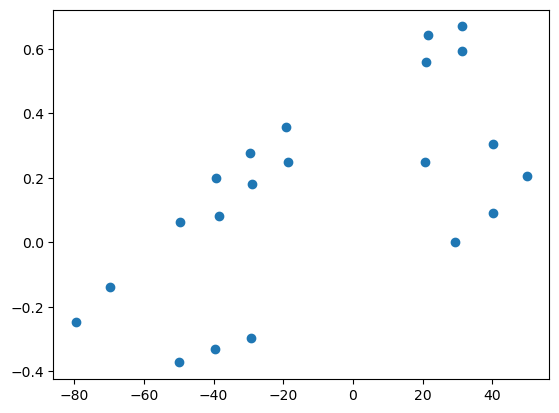

In [14]:
plt.scatter(beta_r0.v, beta_r0.tau)

In [15]:
beta_r0['ca'] = beta_r0['ca'] / 1000.0        # transform Ca2+ conc. to millimolar
beta_r0['tau'] = np.power(10, beta_r0['tau']) # transform interval to linear scale
beta_r0['rate'] = 1.0 / beta_r0['tau']        # get the rates

In [16]:
# data contained in figure 3D, white dots.
beta_r1 = pd.read_csv('open_rate.csv')

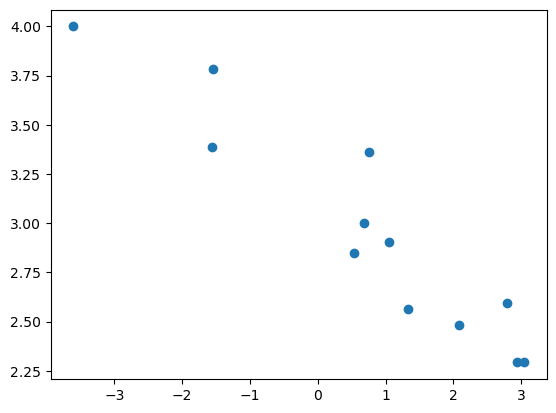

In [17]:
plt.scatter(beta_r1.ca, beta_r1.rate)

In [18]:
beta_r1['v'] = 30.0                          # the data were obtained by clamping at +30mV
beta_r1['ca'] = np.power(10, beta_r1['ca']) # transform Ca2+ conc. to linear
beta_r1['ca'] = beta_r1['ca'] / 1000.0      # transform Ca2+ conc. to millimolar

beta_r1['rate'] = np.power(10, beta_r1['rate']) # transform interval to linear scale
beta_r1['tau'] = 1 / beta_r1['rate']           # transform from 1/s to s
beta_r1['tau'] = beta_r1['tau'] * 1000.0       # transform seconds to milliseconds
beta_r1['rate'] = 1 / beta_r1['tau']           # transform from ms to 1/ms

In [19]:
beta_r = pd.concat([ beta_r0, beta_r1 ]) # merge the datasets

In [20]:
def beta(v, ca): 
    vhalf = -51.449688490633456 + 0.17726174 * np.exp(-(np.log10(ca) - 4.07832681) / 1.02895756)
    k = -24.653642743189497
    
    y = -1.0 / ( np.exp(-(v - vhalf) / k) - 1) * (v - vhalf) / k 
    y[np.abs((v - vhalf)/k) < 1e-5] = 1.0
    return y

(-0.5, 7.0)

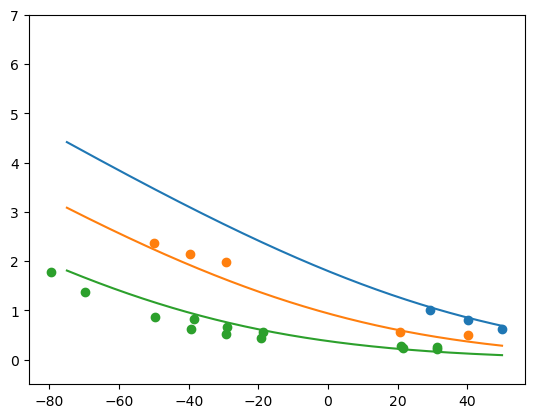

In [23]:
v = np.arange(-75, 50, 0.01)

for ca, g in beta_r0.groupby('ca'):
    plt.scatter(g['v'], g['rate'])
    a = beta(v, ca)
    plt.plot(v, a)

plt.ylim([-0.5, 7])

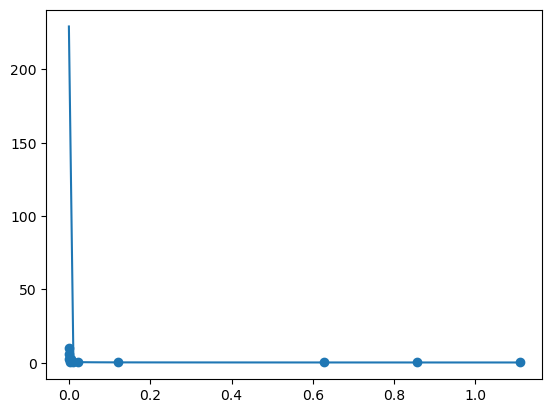

In [25]:
ca = np.linspace(beta_r1['ca'].min(), beta_r1['ca'].max(), 100)

plt.scatter(beta_r1['ca'], beta_r1['rate'])
b = beta(30, ca)
plt.plot(ca, b)

In [63]:
 y0 = 152.0
 y1 = -47.7
 x0 = -1
 x1 = 3
 mm = (y1 - y0) / (x1 - x0)
 qq = - x1 * (y1 - y0) / (x1 - x0) + y1 

In [64]:
mm

-49.925

In [65]:
qq

102.07499999999997

In [68]:
def func_vhalf(ca):
    ca_conc_log = np.log10(ca) + 3
    if ca_conc_log <= -1:
        return 152.0
    elif (ca_conc_log >= 3):
        return -47.7
    else:
        return -49.925 * ca_conc_log + 102.075

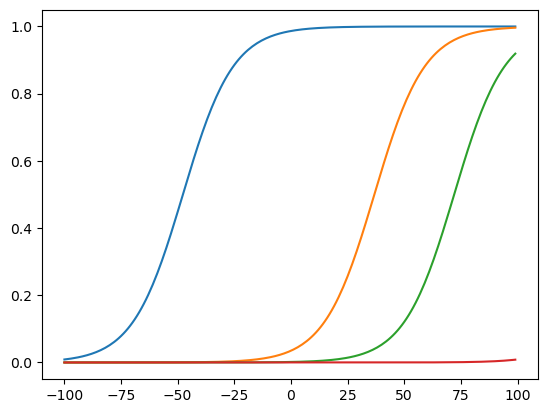

In [69]:
v = np.arange(-100, 100, 1)
for ca in [1024 / 1000.0, 20.3 / 1000.0, 4 / 1000.0, 0.03 / 1000.0]:
    plt.plot(v, 1 / (1 + np.exp(-(v - func_vhalf(ca))/11.1)))